# Homework 3 - Question 2 - Luke Arend

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.fft import fft, fftshift
from scipy.signal import convolve

The response properties of neurons in primary visual cortex (area V1) are often described using linear filters. We’ll examine a one-dimensional cross-section of the most common choice, known as a “Gabor filter” (named after Electrical Engineer/Physicist Denis Gabor, who developed it in 1946 for use in signal processing).

# a)

In [262]:
def make_gabor(sigma, omega, nsamples):
    center = nsamples // 2
    n = np.arange(nsamples) - center
    gaussian = np.exp(-(n ** 2) / (2 * sigma ** 2))
    
    n = np.arange(nsamples)
    sinusoid = np.cos(omega * n)
    return gaussian * sinusoid

def plot_fft(x, title=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 3))
    plt.sca(ax)
    plt.title(title)
    plt.plot(fftshift(np.abs(x)))

Create a one-dimensional linear filter that is a product of a Gaussian and a sinusoid, $e^{−\frac{n^2}{2σ^2}} \cos{ωn}$, with parameters $σ = 3.5$ samples and $ω = 2π * 10/64$ radians/sample. The filter should contain 31 samples, and the Gaussian should be centered on the middle (16th) sample. Plot the filter to verify that it looks like what you’d expect.

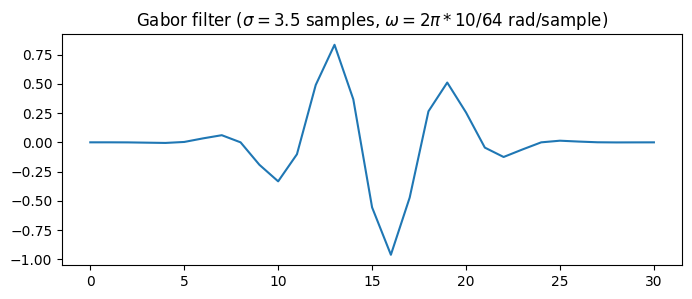

In [263]:
sigma = 3.5
omega = 2 * np.pi * 10 / 64
nsamples = 31
gabor = make_gabor(sigma, omega, nsamples)
plt.subplots(figsize=(8, 3))
plt.title('Gabor filter ($\sigma = 3.5$ samples, $\omega = 2\pi * 10/64$ rad/sample)')
plt.plot(gabor)
plt.show()

Plot the amplitude of the Fourier transform of this filter, sampled at 64 locations (MATLAB’s `fft` function takes an optional additional argument). What kind of filter is this? 

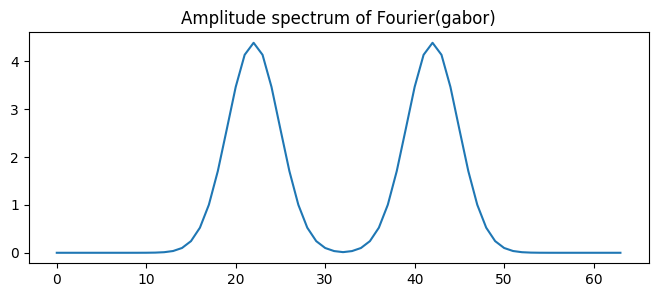

In [264]:
gabor_fft = fft(gabor, n=64)
plot_fft(gabor_fft, title='Amplitude spectrum of Fourier(gabor)')

This is a bandpass filter. It passes frequencies in a band centered on $\omega$ and rejects others. The width of the band is related to $\sigma$.

Why does it have this shape, and how is the shape related to the choice of parameters $(σ, ω)$?

The input to the Fourier transform is $x \odot y$ where $x$ is a Gaussian and $y$ is a sinusoid. The Gaussian depends on $\sigma$ and the sinusoid depends on $\omega$. Multiplying $x$ and $y$ pointwise in the input domain maps to convolving $x$ with $y$ in the output of the Fourier transform. In the Fourier domain, $x$ looks like a pair of delta functions. The distance between them is proportional to the frequency (higher $\omega$ pushes the delta functions outwards). $y$ in the Fourier domain looks like a Gaussian. In the limit of $\sigma \rightarrow 0$ the input Gaussian becomes a delta function and the Fourier amplitude spectrum is a uniform distribution. As $\sigma \rightarrow \infty$ the input Gaussian becomes a uniform distribution whose Fourier amplitude spectrum is a delta function at 0.

Specifically, how does the Fourier amplitude change if you alter each of these parameters?

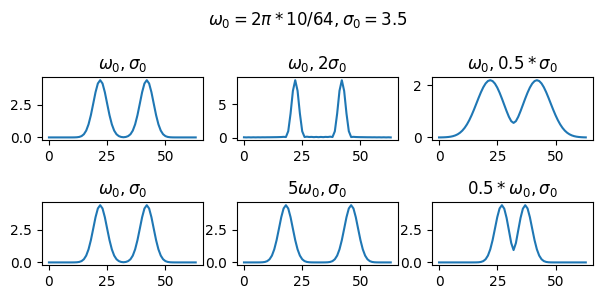

In [265]:
fig, axs = plt.subplots(2, 3, figsize=(6, 3))
plt.suptitle('$\omega_0 = 2\pi * 10/64, \sigma_0 = 3.5$')
x = fft(make_gabor(sigma, omega, nsamples), n=64)
plot_fft(x, '$\omega_0, \sigma_0$', ax=axs[0][0])
x = fft(make_gabor(2 * sigma, omega, nsamples), n=64)
plot_fft(x, '$\omega_0, 2\sigma_0$', ax=axs[0][1])
x = fft(make_gabor(sigma / 2, omega, nsamples), n=64)
plot_fft(x, '$\omega_0, 0.5 * \sigma_0$', ax=axs[0][2])
x = fft(make_gabor(sigma, omega, nsamples), n=64)
plot_fft(x, '$\omega_0, \sigma_0$', ax=axs[1][0])
x = fft(make_gabor(sigma, 5 * omega, nsamples), n=64)
plot_fft(x, '$5\omega_0, \sigma_0$', ax=axs[1][1])
x = fft(make_gabor(sigma, 0.5 * omega, nsamples), n=64)
plot_fft(x, '$0.5*\omega_0, \sigma_0$', ax=axs[1][2])
plt.tight_layout()

The output is two delta functions convolved with a Gaussian, which looks like two Gaussians separated by equal distance from the origin. $\omega$ controls the distance between Gaussians. As $\omega$ increases they grow further apart. $\sigma$ controls how wide the peaks are. As $\sigma$ grows their variance shrinks and they become delta functions as $\sigma \rightarrow \infty$.

# b)

If you were to convolve this filter with sinusoids of different frequencies, which of them would produce a response with the largest amplitude? Obtain this answer by reasoning about the equation defining the filter (above), and also by finding the maximum of the computed Fourier amplitudes (using the `max` function), and verify that the answers are the same.

You would receive the largest amplitude response from a **sinusoid of frequency $\omega$**. When the sinusoid is dotted with $e^{−\frac{n^2}{2σ^2}} \cos{ωn}$, the $e^{−\frac{n^2}{2σ^2}}$ part doesn't depend on $\omega$, so we can look for the sinusoid that maximizes the dot product with $\cos{\omega n}$. This will be a cosine with frequency $\omega$.

4.386364050882267

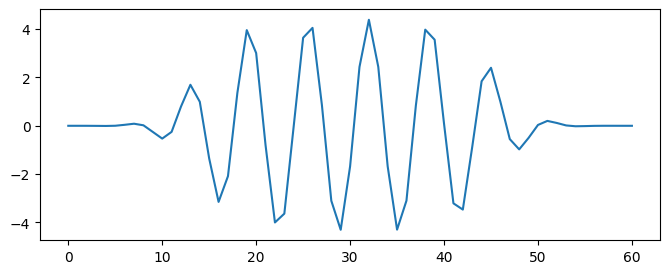

In [266]:
n = np.arange(31)
sinusoid = np.cos(omega * n)
out = convolve(sinusoid, gabor)
plt.subplots(figsize=(8, 3))
plt.plot(out)
np.max(out)

In [267]:
amplitudes = np.abs(fft(gabor, n=64))
np.max(amplitudes)

4.386570296827553

Compute the _period_ of this sinusoid, measured in units of sample spacing, and verify by eye that this is matched to the oscillations in your plot of the filter.

In [268]:
period = 2 * np.pi / omega
period

6.4

$T = \frac{2\pi}{f}$. One sine cycle in the Gabor filter plot above takes up about 6 and a half line segments. So **it checks**.

Which two sinusoids would produce responses with about 25% of this maximal amplitude?

In [269]:
def measure_response(f):
    n = np.arange(nsamples)
    sinusoid_opt = np.cos(2 * np.pi * 10/64 * n)
    sinusoid_f = np.cos(2 * np.pi * f * n)
    amp_opt = np.max(convolve(sinusoid_opt, gabor))
    amp_f = np.max(convolve(sinusoid_f, gabor))
    return amp_f / amp_opt, 1 / f

In [276]:
measure_response(f=10/64)

(1.0, 6.4)

Find by iterative checking:

In [277]:
measure_response(16.43/64)

(0.25003277348849984, 3.8953134510042604)

In [281]:
measure_response((64 - 16.43)/64)

(0.2500327734884952, 1.3453857473197393)

So the sinusoids $\cos{(2\pi\frac{16.43}{64}n)}$ and $\cos{(2\pi\frac{64 - 16.43}{64}n)}$, with periods 3.89 and 1.34 steps respectively, produce amplitude responses of about 25% maximal amplitude.

# c)

Create three unit-amplitude 64-sample sinusoidal signals at the three frequencies (low, mid, high) that you found in part (b). Convolve the filter with each, and verify that the amplitude of the response is approximately consistent with the answers you gave in part (b). (Hint: to estimate amplitude, you’ll either need to project the response onto sine and cosine of the appropriate frequency, or compute the DFT of the response and measure the amplitude at the appropriate frequency.)

In [282]:
def convolved_amplitude(f):
    signal = np.cos(2 * np.pi * f * n)
    return np.max(convolve(signal, gabor))

In [283]:
f1 = 10 / 64
f2 = 16.43 / 64
f3 = (64 - 16.43) / 64
convolved_amplitude(f1), convolved_amplitude(f2), convolved_amplitude(f3)

(4.386364050882267, 1.0967347691723444, 1.096734769172324)

These responses are 25% of the maximum response 4.386.

In [286]:
1.0967 / 4.386

0.2500455996352029